In [3]:
import numpy as np 
import matplotlib.pyplot as plt
import glob
import cv2

In [4]:
from keras.models import Model, Sequential
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten
from keras.layers.normalization import batch_normalization
import os
import seaborn as sns
from keras.applications.vgg16 import VGG16


Data Path


In [5]:
train = r'D:/ML/Data_sets/Tomatod/tomato/train'
test = r'D:/ML/Data_sets/Tomatod/tomato/val'
size=256

In [6]:
train_images = []
train_labels = []
for directory_path in glob.glob('D:/ML/Data_sets/Tomatod/tomato/train/*'):
    label = directory_path.split("\\")[-1]
    print(label)
    for img_path in glob.glob(os.path.join(directory_path,"*.jpg")):
        #print(img_path)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.resize(img,(256,256))
        train_images.append(img)
        train_labels.append(label)

Tomato___Bacterial_spot
Tomato___healthy
Tomato___Late_blight
Tomato___Septoria_leaf_spot
Tomato___Tomato_Yellow_Leaf_Curl_Virus


In [7]:
test_images = []
test_labels = []
for directory_path in glob.glob('D:/ML/Data_sets/Tomatod/tomato/val/*'):
    label = directory_path.split("\\")[-1]
    #print(label)
    for img_path in glob.glob(os.path.join(directory_path,"*.jpg")):
        #print(img_path)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.resize(img,(256,256))
        test_images.append(img)
        test_labels.append(label)

In [8]:
train_images = np.array(train_images)
train_labels = np.array(train_labels)
test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [9]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)
le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)

In [10]:
x_train , y_train, x_test, y_test = train_images, train_labels_encoded, test_images, test_labels_encoded

In [11]:
x_train, x_test = x_train / 255.0 , x_test / 255.0

In [12]:
from keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)


VGG Comes In

In [13]:
VGG_model = VGG16(weights='imagenet', include_top=False,input_shape=(size,size,3))

In [14]:
for layer in VGG_model.layers:
    layer.trainable = False

In [15]:
feature_extractor = VGG_model.predict(x_train)

features = feature_extractor.reshape(feature_extractor.shape[0],-1)

x_for_RF = features

4/4 [==============================] - 9s 2s/step


In [16]:
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators=50, random_state=42)


In [17]:
RF_model.fit(x_for_RF,y_train)

RandomForestClassifier(n_estimators=50, random_state=42)

In [18]:
x_test_feature = VGG_model.predict(x_test)
x_test_features = x_test_feature.reshape(x_test_feature.shape[0],-1)


16/16 [==============================] - 44s 3s/step


In [19]:
prediction_RF = RF_model.predict(x_test_features)
prediction_RF = le.inverse_transform(prediction_RF)

In [20]:
from sklearn.metrics import accuracy_score, confusion_matrix
print("Accuracy => ", accuracy_score(test_labels,prediction_RF)*100)

Accuracy =>  71.6


In [21]:
import pandas as pd
cm = confusion_matrix(test_labels, prediction_RF)
print(cm)

[[89  2  2  5  2]
 [10 66 12 12  0]
 [19 23 46 10  2]
 [ 7  5  6 75  7]
 [ 1  1 13  3 82]]


In [22]:
pd.crosstab(test_labels, prediction_RF)

col_0,Tomato___Bacterial_spot,Tomato___Late_blight,Tomato___Septoria_leaf_spot,Tomato___Tomato_Yellow_Leaf_Curl_Virus,Tomato___healthy
row_0,,,,,
Tomato___Bacterial_spot,89,2,2,5,2
Tomato___Late_blight,10,66,12,12,0
Tomato___Septoria_leaf_spot,19,23,46,10,2
Tomato___Tomato_Yellow_Leaf_Curl_Virus,7,5,6,75,7
Tomato___healthy,1,1,13,3,82


Testing

1/1 [==============================] - 0s 147ms/step


Text(0.5, 1.0, "Predicted as : ['Tomato___healthy']")

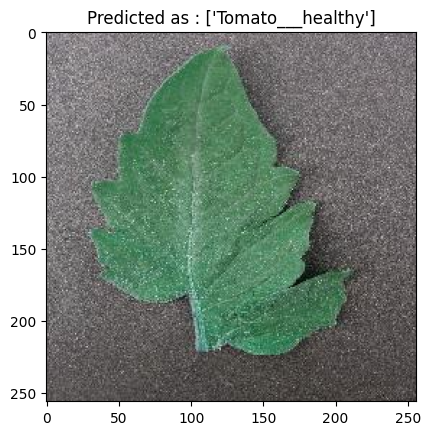

In [23]:
imgT = "D:/ML/Data_sets/Tomatod/tomato/test/healthy.JPG"
imgT1 = cv2.imread(imgT)
imgT1 = imgT1/255.0

input_img = np.expand_dims(imgT1, axis=0)
input_img_features = VGG_model.predict(input_img)
input_img_features = input_img_features.reshape(input_img_features.shape[0],-1)
prediction_RF = RF_model.predict(input_img_features)[0]
prediction_RF = le.inverse_transform([prediction_RF])
plt.imshow(imgT1)
plt.title(f"Predicted as : {prediction_RF}")

Saving the model

In [24]:
import pickle

In [25]:
saved_model = 'VGGandRF.h5'
pickle.dump(RF_model,open(saved_model,'wb'))


In [26]:
feature_extracted_model = 'extracted_features_VGG.h5'
pickle.dump(VGG_model,open(feature_extracted_model,'wb'))

In [27]:
feature_file = 'C:/Users/Lenovo/OneDrive/Desktop/ML/Project_Src/extracted_features_VGG.h5'
loaded_feature = pickle.load(open(feature_file,'rb'))

In [28]:
filename = 'C:/Users/Lenovo/OneDrive/Desktop/ML/Project_Src/VGGandRF.h5'
loaded_model = pickle.load(open(filename,'rb'))

Testing the Loaded Model

1/1 [==============================] - 0s 133ms/step


Text(0.5, 1.0, 'Predicted as : Septoria Leaf Spot')

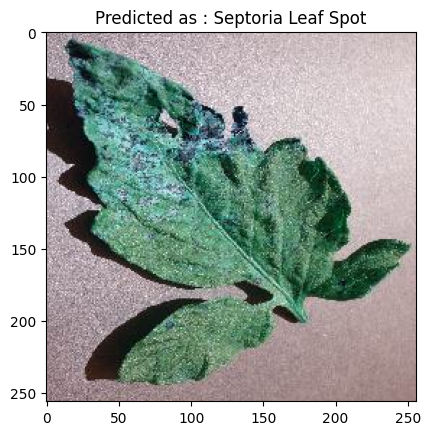

In [31]:
imgT = "D:/ML/Data_sets/Tomatod/tomato/test/sept.JPG"
imgT1 = cv2.imread(imgT)
imgT1 = imgT1/255.0

input_img = np.expand_dims(imgT1, axis=0)
input_img_features = loaded_feature.predict(input_img)
input_img_features = input_img_features.reshape(input_img_features.shape[0],-1)
prediction_RF = loaded_model.predict(input_img_features)[0]
results = {0:"Bacterial Spot",1:"Late Blight",2:"Septoria Leaf Spot",4:"Healthy"}
prediction_RF = results[prediction_RF]
plt.imshow(imgT1)
plt.title(f"Predicted as : {prediction_RF}")